# PowerGrid Insights: Illuminating America's Outage Landscape

**Name(s)**: Eric Sun & Sunan Xu

**Website Link**: https://ericsun153.github.io/Illuminating_US_Outage_Landscape/

## Code

In [36]:
import pandas as pd
import numpy as np
import os

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'png'
pd.options.plotting.backend = 'plotly'


import matplotlib as plt
import seaborn as sns

Since the file type of our dataset is xlsx, we first convert it into csv file using the **openpyxl** library and store it into a csv file called 'outage.csv'.

In [2]:
!pip install openpyxl

In [3]:
xlsx_file = 'outage.xlsx'
csv_file = 'outage.csv'

df = pd.read_excel(xlsx_file)

# Write the DataFrame to a CSV file
df.to_csv(csv_file, index=False)
df = pd.read_csv('outage.csv')
df

,Major power outage events in the continental U.S.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Time period: January 2000 - July 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Regions affected: Outages reported in this dat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,NaN,1530,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996492121418,2.40176525502843,2.40176525502843
1536,NaN,1531,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996492121418,2.40176525502843,2.40176525502843
1537,NaN,1532,2009,8,South Dakota,SD,RFC,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077441776026,1.69225582239743,1.69225582239743
1538,NaN,1533,2009,8,South Dakota,SD,MRO,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077441776026,1.69225582239743,1.69225582239743


### Cleaning and EDA

First 5 rows are the header of the dataset, we drop them and filter it into correct format in each column

In [4]:
rows_to_skip = list(range(5))
df = pd.read_csv('outage.csv', skiprows=rows_to_skip, index_col='OBS')

# Combine the units line and column names, drop unecessary rows and columns
column = np.array(df.columns).astype('str')
unites = np.array(df.iloc[0].fillna('')).astype('str')
unites = ["(" + i + ")" for i in unites]
for i in range(len(unites)):
    if unites[i] == '()':
        unites[i] = ''
combined_column = np.core.defchararray.add(column, unites)
df.columns = combined_column
df = df.reset_index().drop(0).drop('variables(Units)', axis=1).reset_index(drop=True)
df

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL(numeric),CLIMATE.CATEGORY,"OUTAGE.START.DATE(Day of the week, Month Day, Year)",...,POPPCT_URBAN(%),POPPCT_UC(%),POPDEN_URBAN(persons per square mile),POPDEN_UC(persons per square mile),POPDEN_RURAL(persons per square mile),AREAPCT_URBAN(%),AREAPCT_UC(%),PCT_LAND(%),PCT_WATER_TOT(%),PCT_WATER_INLAND(%)
0,1.0,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5926658691451,8.40733413085488,5.47874298334407
1,2.0,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5926658691451,8.40733413085488,5.47874298334407
2,3.0,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5926658691451,8.40733413085488,5.47874298334407
3,4.0,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5926658691451,8.40733413085488,5.47874298334407
4,5.0,2015.0,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5926658691451,8.40733413085488,5.47874298334407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,1530.0,2011.0,12.0,North Dakota,ND,MRO,West North Central,-0.9,cold,2011-12-06 00:00:00,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996492121418,2.40176525502843,2.40176525502843
1530,1531.0,2006.0,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996492121418,2.40176525502843,2.40176525502843
1531,1532.0,2009.0,8.0,South Dakota,SD,RFC,West North Central,0.5,warm,2009-08-29 00:00:00,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077441776026,1.69225582239743,1.69225582239743
1532,1533.0,2009.0,8.0,South Dakota,SD,MRO,West North Central,0.5,warm,2009-08-29 00:00:00,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077441776026,1.69225582239743,1.69225582239743


In [5]:
df['YEAR'] = df['YEAR'].astype('int')
# Combine 'OUTAGE.START.DATE' and 'OUTAGE.START.TIME' into a new pd.Timestamp column called 'OUTAGE.START'
start_time = df['OUTAGE.START.TIME(Hour:Minute:Second (AM / PM))']
start_date = df['OUTAGE.START.DATE(Day of the week, Month Day, Year)']
df["OUTAGE.START"] = pd.to_datetime(start_date + " " + start_time)
# combine 'OUTAGE.RESTORATION.DATE' and 'OUTAGE.RESTORATION.TIME' into a new pd.Timestamp column called 'OUTAGE.RESTORATION'.
end_time = df['OUTAGE.RESTORATION.TIME(Hour:Minute:Second (AM / PM))']
end_date = df['OUTAGE.RESTORATION.DATE(Day of the week, Month Day, Year)']
df["OUTAGE.RESTORATION"] = pd.to_datetime(end_date + " " + end_time)
df[['OUTAGE.RESTORATION', 'OUTAGE.START']]

,OUTAGE.RESTORATION,OUTAGE.START
0,2011-07-03 20:00:00,2011-07-01 17:00:00
1,2014-05-11 18:39:00,2014-05-11 18:38:00
2,2010-10-28 22:00:00,2010-10-26 20:00:00
3,2012-06-20 23:00:00,2012-06-19 04:30:00
4,2015-07-19 07:00:00,2015-07-18 02:00:00
...,...,...
1529,2011-12-06 20:00:00,2011-12-06 08:00:00
1530,NaT,NaT
1531,2009-08-29 23:53:00,2009-08-29 22:54:00
1532,2009-08-29 14:01:00,2009-08-29 11:00:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 58 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   OBS                                                        1534 non-null   float64       
 1   YEAR                                                       1534 non-null   int32         
 2   MONTH                                                      1525 non-null   float64       
 3   U.S._STATE                                                 1534 non-null   object        
 4   POSTAL.CODE                                                1534 non-null   object        
 5   NERC.REGION                                                1534 non-null   object        
 6   CLIMATE.REGION                                             1528 non-null   object        
 7   ANOMALY.LEVEL(numeric)           

We should then convert all the columns into proper data types

In [7]:
df['ANOMALY.LEVEL'] = df['ANOMALY.LEVEL(numeric)'].astype(float)
df = df.drop(columns=['ANOMALY.LEVEL(numeric)', 'OUTAGE.START.DATE(Day of the week, Month Day, Year)',
                      'OUTAGE.START.TIME(Hour:Minute:Second (AM / PM))', 
                      'OUTAGE.RESTORATION.DATE(Day of the week, Month Day, Year)',
                      'OUTAGE.RESTORATION.TIME(Hour:Minute:Second (AM / PM))'], axis=1)

In [8]:
columns_to_convert = {'OUTAGE.DURATION(mins)': float, 'DEMAND.LOSS.MW(Megawatt)': float,
                      'RES.PRICE(cents / kilowatt-hour)': float, 'COM.PRICE(cents / kilowatt-hour)': float,
                     'COM.PRICE(cents / kilowatt-hour)':float, 'IND.PRICE(cents / kilowatt-hour)': float,
                     'TOTAL.PRICE(cents / kilowatt-hour)':float, 'RES.SALES(Megawatt-hour)': float,
                     'COM.SALES(Megawatt-hour)':float, 'IND.SALES(Megawatt-hour)':float, 'TOTAL.PRICE(cents / kilowatt-hour)':float,
                     'RES.PERCEN(%)':float, 'COM.PERCEN(%)':float, 'IND.PERCEN(%)':float, 'RES.CUST.PCT(%)':float,
                     'COM.CUST.PCT(%)':float, 'IND.CUST.PCT(%)':float, 'PC.REALGSP.STATE(USD)':float, 'PC.REALGSP.USA(USD)':float,
                     'PC.REALGSP.REL(fraction)':float, 'PC.REALGSP.CHANGE(%)':float, 'UTIL.REALGSP(USD)':float, 'TOTAL.REALGSP(USD)':float,
                     'UTIL.CONTRI(%)':float, 'PI.UTIL.OFUSA(%)':float, 'POPPCT_URBAN(%)':float, 'POPPCT_UC(%)':float, 
                     'POPDEN_URBAN(persons per square mile)':float, 'POPDEN_UC(persons per square mile)':float, 
                     'POPDEN_RURAL(persons per square mile)':float, 'AREAPCT_URBAN(%)':float, 'AREAPCT_UC(%)':float,
                     'PCT_LAND(%)':float, 'PCT_WATER_TOT(%)':float, 'PCT_WATER_INLAND(%)':float,'TOTAL.SALES(Megawatt-hour)':float}

In [9]:
df = df.astype(columns_to_convert)
df

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,...,POPDEN_UC(persons per square mile),POPDEN_RURAL(persons per square mile),AREAPCT_URBAN(%),AREAPCT_UC(%),PCT_LAND(%),PCT_WATER_TOT(%),PCT_WATER_INLAND(%),OUTAGE.START,OUTAGE.RESTORATION,ANOMALY.LEVEL
0,1.0,2011,7.0,Minnesota,MN,MRO,East North Central,normal,severe weather,NaN,...,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2011-07-01 17:00:00,2011-07-03 20:00:00,-0.3
1,2.0,2014,5.0,Minnesota,MN,MRO,East North Central,normal,intentional attack,vandalism,...,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2014-05-11 18:38:00,2014-05-11 18:39:00,-0.1
2,3.0,2010,10.0,Minnesota,MN,MRO,East North Central,cold,severe weather,heavy wind,...,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2010-10-26 20:00:00,2010-10-28 22:00:00,-1.5
3,4.0,2012,6.0,Minnesota,MN,MRO,East North Central,normal,severe weather,thunderstorm,...,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2012-06-19 04:30:00,2012-06-20 23:00:00,-0.1
4,5.0,2015,7.0,Minnesota,MN,MRO,East North Central,warm,severe weather,NaN,...,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743,2015-07-18 02:00:00,2015-07-19 07:00:00,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,1530.0,2011,12.0,North Dakota,ND,MRO,West North Central,cold,public appeal,NaN,...,1868.2,3.9,0.27,0.10,97.599649,2.401765,2.401765,2011-12-06 08:00:00,2011-12-06 20:00:00,-0.9
1530,1531.0,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,fuel supply emergency,Coal,...,1868.2,3.9,0.27,0.10,97.599649,2.401765,2.401765,NaT,NaT,NaN
1531,1532.0,2009,8.0,South Dakota,SD,RFC,West North Central,warm,islanding,NaN,...,1905.4,4.7,0.30,0.15,98.307744,1.692256,1.692256,2009-08-29 22:54:00,2009-08-29 23:53:00,0.5
1532,1533.0,2009,8.0,South Dakota,SD,MRO,West North Central,warm,islanding,NaN,...,1905.4,4.7,0.30,0.15,98.307744,1.692256,1.692256,2009-08-29 11:00:00,2009-08-29 14:01:00,0.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   OBS                                    1534 non-null   float64       
 1   YEAR                                   1534 non-null   int32         
 2   MONTH                                  1525 non-null   float64       
 3   U.S._STATE                             1534 non-null   object        
 4   POSTAL.CODE                            1534 non-null   object        
 5   NERC.REGION                            1534 non-null   object        
 6   CLIMATE.REGION                         1528 non-null   object        
 7   CLIMATE.CATEGORY                       1525 non-null   object        
 8   CAUSE.CATEGORY                         1534 non-null   object        
 9   CAUSE.CATEGORY.DETAIL                  1063 non-null   object  

In [11]:
df.value_counts()

OBS     YEAR  MONTH  U.S._STATE      POSTAL.CODE  NERC.REGION  CLIMATE.REGION  CLIMATE.CATEGORY  CAUSE.CATEGORY  CAUSE.CATEGORY.DETAIL  HURRICANE.NAMES  OUTAGE.DURATION(mins)  DEMAND.LOSS.MW(Megawatt)  CUSTOMERS.AFFECTED  RES.PRICE(cents / kilowatt-hour)  COM.PRICE(cents / kilowatt-hour)  IND.PRICE(cents / kilowatt-hour)  TOTAL.PRICE(cents / kilowatt-hour)  RES.SALES(Megawatt-hour)  COM.SALES(Megawatt-hour)  IND.SALES(Megawatt-hour)  TOTAL.SALES(Megawatt-hour)  RES.PERCEN(%)  COM.PERCEN(%)  IND.PERCEN(%)  RES.CUSTOMERS  COM.CUSTOMERS  IND.CUSTOMERS  TOTAL.CUSTOMERS  RES.CUST.PCT(%)  COM.CUST.PCT(%)  IND.CUST.PCT(%)  PC.REALGSP.STATE(USD)  PC.REALGSP.USA(USD)  PC.REALGSP.REL(fraction)  PC.REALGSP.CHANGE(%)  UTIL.REALGSP(USD)  TOTAL.REALGSP(USD)  UTIL.CONTRI(%)  PI.UTIL.OFUSA(%)  POPULATION  POPPCT_URBAN(%)  POPPCT_UC(%)  POPDEN_URBAN(persons per square mile)  POPDEN_UC(persons per square mile)  POPDEN_RURAL(persons per square mile)  AREAPCT_URBAN(%)  AREAPCT_UC(%)  PCT_LAND(%)  PCT_WATE

#### EDA

We can first find some relationship or patterns within columns

In [12]:
all_states = df['U.S._STATE'].value_counts()
all_states

California              210
Texas                   127
Washington               97
Michigan                 95
New York                 71
Maryland                 58
Pennsylvania             57
Illinois                 46
Florida                  45
Ohio                     43
Indiana                  43
Utah                     41
Delaware                 41
North Carolina           40
Louisiana                40
Virginia                 37
New Jersey               35
Tennessee                34
Arizona                  28
Oregon                   26
Arkansas                 25
Oklahoma                 24
Wisconsin                20
Maine                    19
Massachusetts            18
Connecticut              18
Georgia                  17
Missouri                 17
Colorado                 15
Minnesota                15
New Hampshire            14
Kentucky                 13
District of Columbia     10
Idaho                     9
Vermont                   9
Kansas              

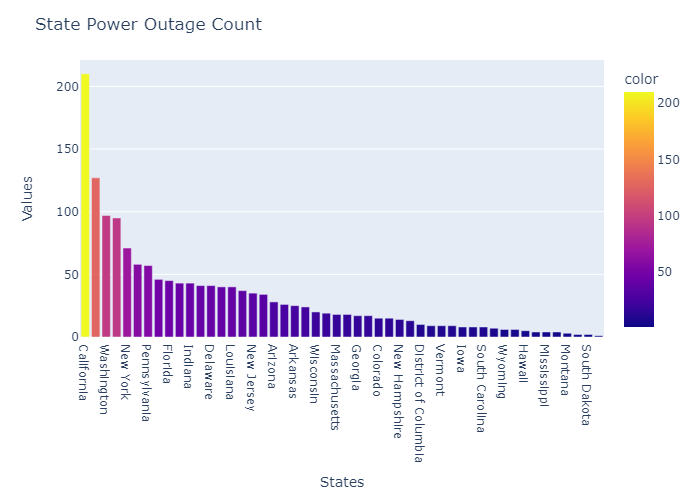

In [37]:
fig = px.bar(all_states, color=all_states.values)
fig.update_layout(title='State Power Outage Count', xaxis_title='States', yaxis_title='Values')

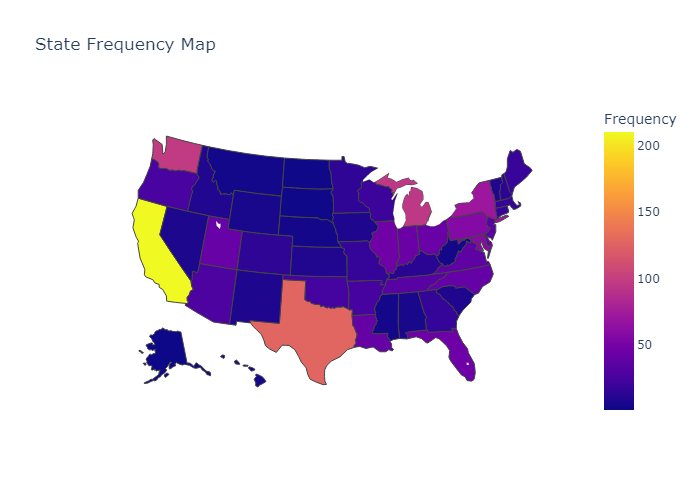

In [38]:
state_counts = df['POSTAL.CODE'].value_counts().reset_index()
state_counts.columns = ['POSTAL.CODE', 'Frequency']

# Create the geospatial graph
fig = px.choropleth(state_counts, 
                    locations='POSTAL.CODE', 
                    locationmode='USA-states',
                    color='Frequency',
                    scope='usa',
                    labels={'Frequency': 'Frequency'},
                    title='State Frequency Map')

fig.show()

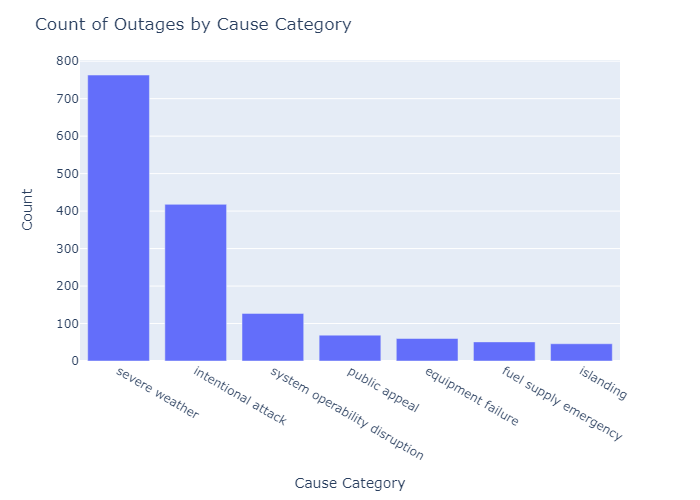

In [39]:
fig = px.bar(df['CAUSE.CATEGORY'].value_counts(), x=df['CAUSE.CATEGORY'].value_counts().index, y=df['CAUSE.CATEGORY'].value_counts().values)
fig.update_layout(title='Count of Outages by Cause Category', xaxis_title='Cause Category', yaxis_title='Count')
fig.show()

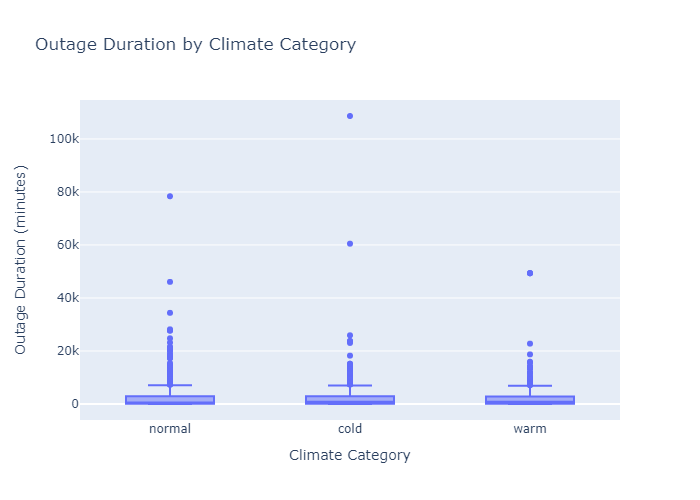

In [40]:
fig = px.box(df, x='CLIMATE.CATEGORY', y='OUTAGE.DURATION(mins)', title='Outage Duration by Climate Category')
fig.update_layout(xaxis_title='Climate Category', yaxis_title='Outage Duration (minutes)')
fig.show()

The relationship between residential sales and commericial sales, find some pattern when set the color to population

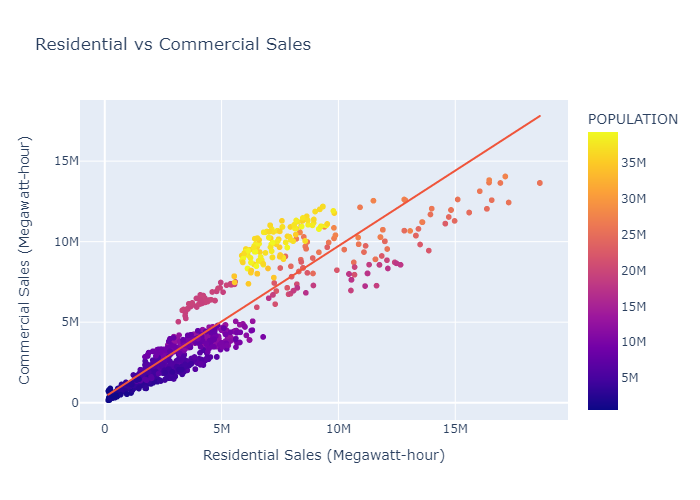

In [41]:
fig = px.scatter(df, x='RES.SALES(Megawatt-hour)', y='COM.SALES(Megawatt-hour)', title='Residential vs Commercial Sales', trendline='ols',color = 'POPULATION')
fig.update_layout(xaxis_title='Residential Sales (Megawatt-hour)', yaxis_title='Commercial Sales (Megawatt-hour)')
fig.show()

Correlation between each column (Correlation Heatmap)

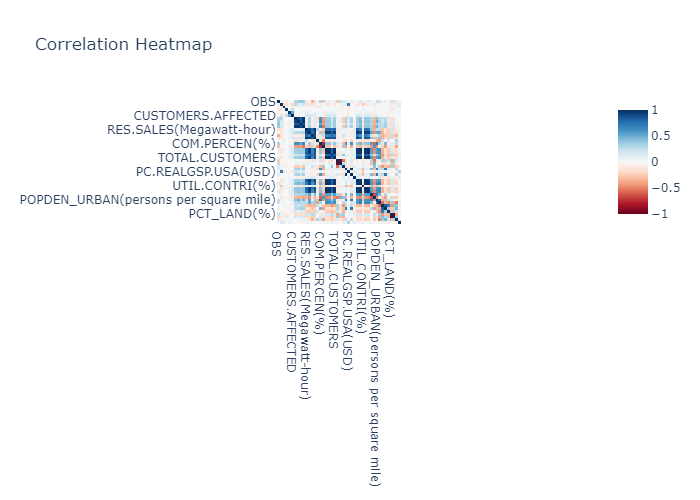

In [42]:
corr_matrix = df.corr()  # Assuming you want to calculate correlations between all numeric columns
fig = px.imshow(corr_matrix, color_continuous_scale='RdBu', title='Correlation Heatmap')
fig.show()

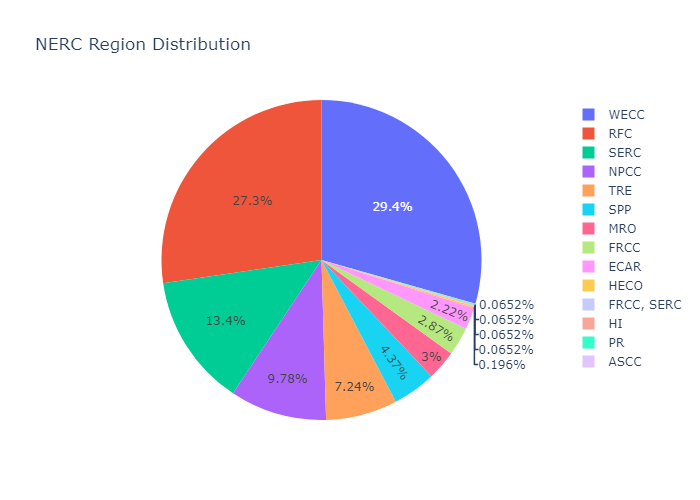

In [43]:
fig = px.pie(df, names='NERC.REGION', title='NERC Region Distribution')
fig.show()

### Assessment of Missingness

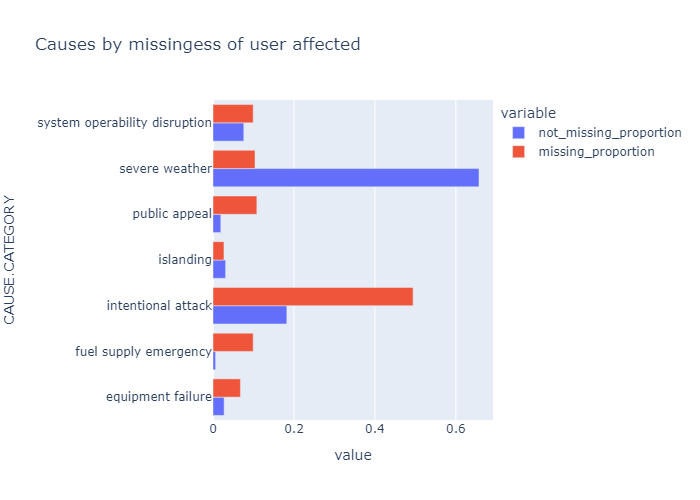

In [44]:
# Does missingness of customers affected depend on the cause category? 
df['CAUSE.CATEGORY']
df.groupby('CAUSE.CATEGORY').count()
df_ca_missing = df[df['CUSTOMERS.AFFECTED'].isna()]
df_ca_not_missing = df[~df['CUSTOMERS.AFFECTED'].isna()]
missing_count = df_ca_missing.groupby('CAUSE.CATEGORY').count()['YEAR']
missing_proportion = pd.Series(np.array(missing_count)/((np.array(missing_count)).sum()), index=missing_count.index)
not_missing_count = df_ca_not_missing.groupby('CAUSE.CATEGORY').count()['YEAR']
not_missing_proportion = pd.Series(np.array(not_missing_count)/((np.array(not_missing_count)).sum()), index=not_missing_count.index)
observed_tvd_statistic = abs(not_missing_proportion - missing_proportion).sum()
observed_dataframe = pd.concat([not_missing_proportion, missing_proportion], axis=1, keys=['not_missing_proportion', 'missing_proportion'])
observed_dataframe.plot(kind='barh', title='Causes by missingess of user affected', barmode='group')

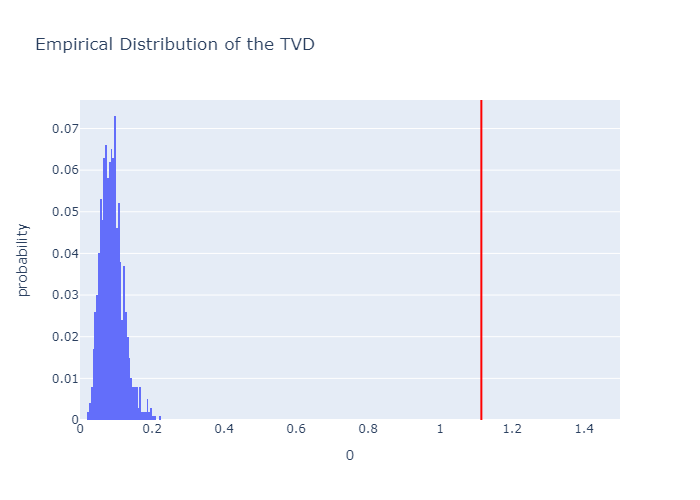

In [45]:
def cause_one_permutation(df):
    df = df.copy()
    df['CUSTOMERS.AFFECTED'] = np.random.permutation(df['CUSTOMERS.AFFECTED'])
    df['CAUSE.CATEGORY']
    df.groupby('CAUSE.CATEGORY').count()
    df_ca_missing = df[df['CUSTOMERS.AFFECTED'].isna()]
    df_ca_not_missing = df[~df['CUSTOMERS.AFFECTED'].isna()]
    missing_count = df_ca_missing.groupby('CAUSE.CATEGORY').count()['YEAR']
    missing_proportion = pd.Series(np.array(missing_count)/((np.array(missing_count)).sum()), index=missing_count.index)
    not_missing_count = df_ca_not_missing.groupby('CAUSE.CATEGORY').count()['YEAR']
    not_missing_proportion = pd.Series(np.array(not_missing_count)/((np.array(not_missing_count)).sum()), index=not_missing_count.index)
    observed_tvd_statistic = abs(not_missing_proportion - missing_proportion).sum()
    return observed_tvd_statistic
# do permutation 1000 times
result = []
for i in range(1000):
    result.append(cause_one_permutation(df))
fig = px.histogram(pd.DataFrame(result), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the TVD')
fig.add_vline(x=observed_tvd_statistic, line_color='red')
fig.update_layout(xaxis_range=[0, 1.5])

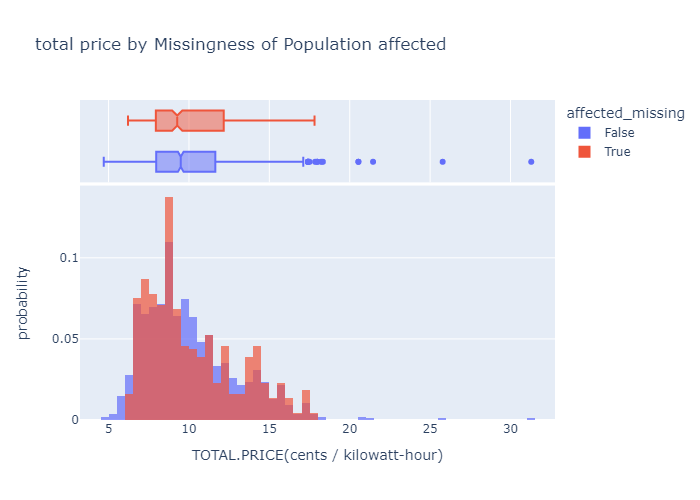

In [46]:
# Does missingness of customers affected depend on the cause category? 
from scipy import stats
df['TOTAL.PRICE(cents / kilowatt-hour)']
df.groupby('TOTAL.PRICE(cents / kilowatt-hour)').count()
df_ca_missing = df[df['CUSTOMERS.AFFECTED'].isna()]
df_ca_not_missing = df[~df['CUSTOMERS.AFFECTED'].isna()]
missing_distribution = df_ca_missing['TOTAL.PRICE(cents / kilowatt-hour)']
not_missing_distribution = df_ca_not_missing['TOTAL.PRICE(cents / kilowatt-hour)']
observed_dataframe = pd.concat([not_missing_distribution, missing_distribution], axis=1, keys=['not_missing_proportion', 'missing_proportion'])
specific_df = df[['TOTAL.PRICE(cents / kilowatt-hour)','CUSTOMERS.AFFECTED' ]].copy()
specific_df['affected_missing'] = specific_df['CUSTOMERS.AFFECTED'].isna()
per_na = df_ca_missing['TOTAL.PRICE(cents / kilowatt-hour)']
per_va = df_ca_not_missing['TOTAL.PRICE(cents / kilowatt-hour)']
obsersed_stat2 = stats.ks_2samp(per_na, per_va).statistic
px.histogram(specific_df, x='TOTAL.PRICE(cents / kilowatt-hour)', color='affected_missing', histnorm='probability', marginal='box',
             title="total price by Missingness of Population affected", barmode='overlay', opacity=0.7)

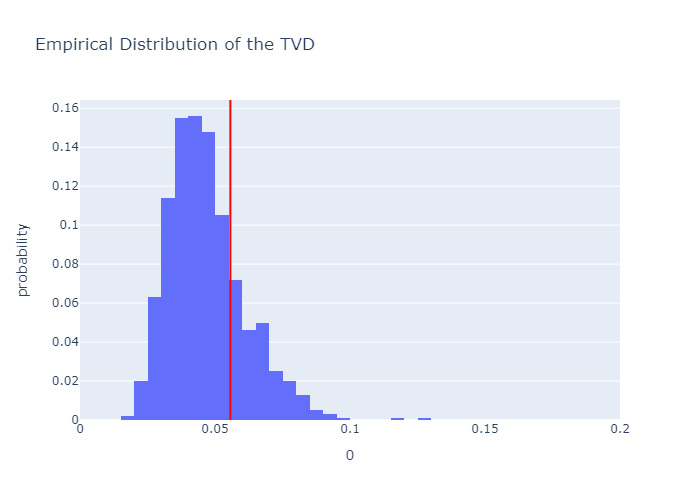

In [47]:
def cause_one_permutation2(df):
    df = df.copy()
    df['CUSTOMERS.AFFECTED'] = np.random.permutation(df['CUSTOMERS.AFFECTED'])
    df['TOTAL.PRICE(cents / kilowatt-hour)']
    df.groupby('TOTAL.PRICE(cents / kilowatt-hour)').count()
    df_ca_missing = df[df['CUSTOMERS.AFFECTED'].isna()]
    df_ca_not_missing = df[~df['CUSTOMERS.AFFECTED'].isna()]
    specific_df = df[['TOTAL.PRICE(cents / kilowatt-hour)','CUSTOMERS.AFFECTED' ]].copy()
    specific_df['affected_missing'] = specific_df['CUSTOMERS.AFFECTED'].isna()
    per_na = df_ca_missing['TOTAL.PRICE(cents / kilowatt-hour)']
    per_va = df_ca_not_missing['TOTAL.PRICE(cents / kilowatt-hour)']
    obsersed_stat = stats.ks_2samp(per_na, per_va).statistic
    return obsersed_stat
result2 = []
for i in range(1000):
    result2.append(cause_one_permutation2(df))
fig2 = px.histogram(pd.DataFrame(result2), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the TVD')
fig2.add_vline(x=obsersed_stat2, line_color='red')
fig2.update_layout(xaxis_range=[0, 0.2])

In [48]:
p_value1 = (np.array(result) > observed_tvd_statistic).mean()
p_value2 = (np.array(result2) > obsersed_stat2).mean()
observed_tvd_statistic

1.1148675909814136

### Hypothesis Testing

observed: overall_duration 2625.39837398374 west_duration 1628.331707317073
p value for the duration hypothesis test =  0.0004


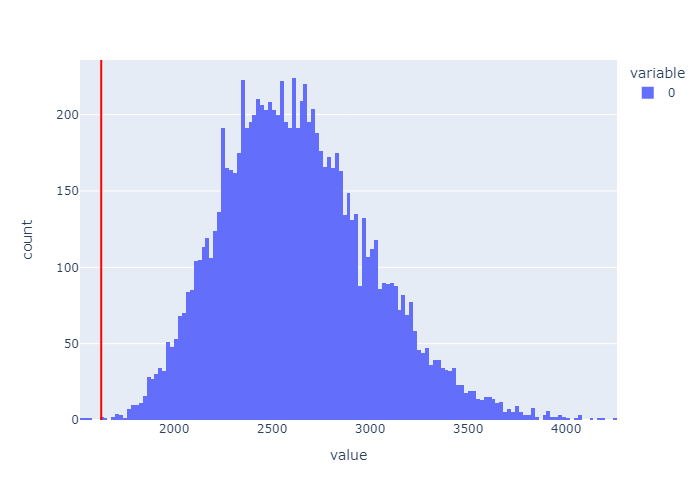

In [49]:
west_duration = df[df['CLIMATE.REGION']=='West']['OUTAGE.DURATION(mins)']
overall_duration = df['OUTAGE.DURATION(mins)']
print('observed:', 'overall_duration',overall_duration.mean(), 'west_duration',west_duration.mean())

duration_simulation_result = []
for i in range(10000):
    each_duration_simulation = pd.Series(np.random.choice(overall_duration, size=len(west_duration), replace=False)).mean()
    duration_simulation_result.append(each_duration_simulation)
p_val_hypo_1 = (np.array(duration_simulation_result) < west_duration.mean()).mean()
print('p value for the duration hypothesis test = ', p_val_hypo_1)
fig_hyp1 = px.histogram(duration_simulation_result)
fig_hyp1.add_vline(west_duration.mean(), line_color='red')

### Hypothesis test: people affected

observed: overall_affected:  143456.22273143905 west_affected:  194579.89393939395
p value for the duration hypothesis test =  0.0151


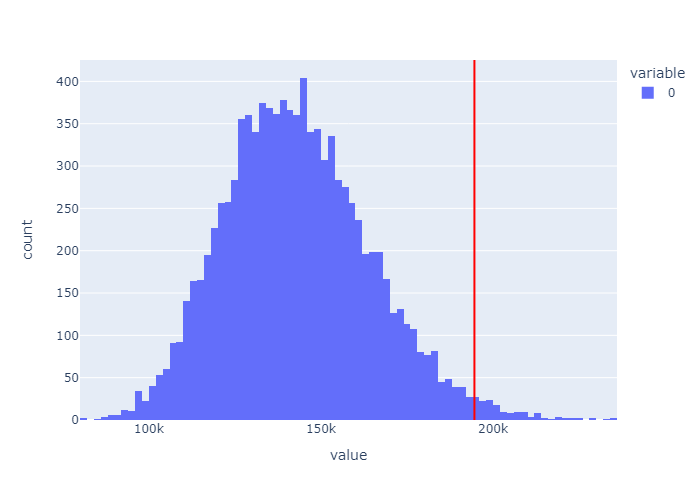

In [50]:
west_affected = df[df['CLIMATE.REGION']=='West']['CUSTOMERS.AFFECTED']
overall_affected = df['CUSTOMERS.AFFECTED']
print('observed:', 'overall_affected: ',overall_affected.mean(), 'west_affected: ',west_affected.mean())

affected_simulation_result = []
for i in range(10000):
    each_affected_simulation = pd.Series(np.random.choice(overall_affected, size=len(west_affected), replace=False)).mean()
    affected_simulation_result.append(each_affected_simulation)
p_val_hypo_2 = (np.array(affected_simulation_result) > west_affected.mean()).mean()
print('p value for the duration hypothesis test = ', p_val_hypo_2)
fig_hyp2 = px.histogram(affected_simulation_result)
fig_hyp2.add_vline(west_affected.mean(), line_color='red')